####  Utilise the desitarget randoms with geomask cuts.

Writes the randoms for one SV tile to disk, after applying bitmask and GAMA boundaries.  

In [1]:
import  os
import  yaml
import  astropy.io.fits        as fits
import  pylab                  as pl
import  numpy                  as np

from    desiutil.bitmask       import BitMask
from    desitarget.targetmask  import load_mask_bits
from    desitarget.targets     import target_bitmask_to_string, decode_targetid

In [2]:
from    astropy.table          import Table, unique

In [3]:
from    desitarget.geomask     import is_in_hp
from    desimodel.footprint    import is_point_in_desi

In [16]:
basedir   = os.path.join(os.getenv('SCRATCH'), 'svdc-summer2018', 'master')
tilesfile = os.path.join(basedir, 'tiles', 'bgs-gama-tiles-bright.fits')

In [17]:
##  Grab the SV tiles.
tiles = Table(fits.open(tilesfile)[1].data)
tiles

TILEID,RA,DEC,PASS,IN_DESI,EBV_MED,AIRMASS,STAR_DENSITY,EXPOSEFAC,PROGRAM,OBSCONDITIONS
int32,float64,float64,int16,int16,float32,float32,float32,float32,str6,int32
100000,212.399993896,-0.819999992847,5,1,0.0504712,1.0,1.0,1.0,BRIGHT,4
100001,213.199996948,-0.800000011921,5,1,0.0498524,1.0,1.0,1.0,BRIGHT,4
100002,214.0,-0.77999997139,5,1,0.049985,1.0,1.0,1.0,BRIGHT,4
100003,214.799987793,-0.759999990463,5,1,0.0459586,1.0,1.0,1.0,BRIGHT,4
100004,215.599990845,-0.819999992847,5,1,0.0451689,1.0,1.0,1.0,BRIGHT,4
100005,216.399993896,-0.800000011921,5,1,0.042806,1.0,1.0,1.0,BRIGHT,4
100006,217.199996948,-0.77999997139,5,1,0.0435473,1.0,1.0,1.0,BRIGHT,4
100007,218.0,-0.759999990463,5,1,0.042242,1.0,1.0,1.0,BRIGHT,4
100008,218.799987793,-0.819999992847,5,1,0.042335,1.0,1.0,1.0,BRIGHT,4


In [18]:
##  Grab the imaging randoms. 
dat = fits.open('/project/projectdirs/desi/target/catalogs/dr7.1/0.27.0/randoms-dr7.1-0.27.0.fits')

In [29]:
dat.info()

Filename: /project/projectdirs/desi/target/catalogs/dr7.1/0.27.0/randoms-dr7.1-0.27.0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  RANDOMS       1 BinTableHDU     72   1124432104R x 15C   [D, D, 8A, I, I, I, E, E, E, E, E, E, I, E, K]   


In [30]:
dat[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   68 / width of table in bytes                        
NAXIS2  =           1124432104 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   15 / number of fields in each row                   
TTYPE1  = 'RA      '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'DEC     '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'BRICKNAME'       

In [31]:
##  Normally, the bitmasks would be handled as follows.  But there doesn't appear to be a randoms BitMask.
bitdefs = load_mask_bits()
##  bitdefs

In [32]:
mask = BitMask('desi_mask', bitdefs)

In [33]:
# mask.bitname(4)
# mask.comment(4)
# mask.names()

In [26]:
# len(dat[1].data['RA'])
indices = np.random.randint(0, high=1000, size=100)

In [34]:
# pl.scatter(dat[1].data['RA'][indices], dat[1].data['DEC'][indices], s=5)

In [37]:
##  issv = is_point_in_desi(tiles, dat[1].data['RA'], dat[1].data['DEC'], radius=desimodel.focalplane.get_tile_radius_deg) 
##  issv = np.isin(dat[1].data['HPXPIXEL'], np.array([25912, 25913, 25914, 25915, 25916, 25917, 25918, 25919, 25962, 26000, 26001, 26002, 26003, 26004, 26005, 26006, 26007, 26012, 26013, 26048, 26050]))

In [15]:
sv = dat[1].data[issv]

In [16]:
sv = Table(sv)
sv

RA,DEC,BRICKNAME,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,MASKBITS,EBV,HPXPIXEL
float64,float64,str8,int16,int16,int16,float32,float32,float32,float32,float32,float32,int16,float32,int64
209.684906925,-1.11828709404,2096m010,3,3,4,1444.04,622.976,160.304,932.209,363.007,81.7151,0,0.0462005,26002
209.691871522,-1.07750391614,2096m010,3,1,4,998.957,143.418,144.419,706.628,98.4006,72.224,0,0.0450521,26002
209.727126125,-1.11050026831,2096m010,2,2,2,1200.08,526.347,63.6826,776.543,292.762,38.7418,0,0.0457265,26002
209.683091402,-1.10273086031,2096m010,3,3,4,1444.04,622.976,160.304,932.209,363.007,81.7151,0,0.0457109,26002
209.746838428,-1.12038022943,2096m010,2,2,2,1200.08,526.347,63.6826,776.543,292.762,38.7418,0,0.0458968,26002
209.663853961,-1.08772732606,2096m010,4,4,5,1691.67,766.394,182.889,1111.46,461.407,92.6343,0,0.0454941,26002
209.724189285,-1.0317290259,2096m010,3,3,3,1430.25,661.62,85.734,945.623,387.037,49.5232,0,0.0445093,26002
209.644583482,-1.10595111836,2096m010,3,3,4,1444.04,622.976,160.304,932.209,363.007,81.7151,0,0.0462017,26002
209.740379465,-1.08388724373,2096m010,2,2,2,782.586,450.173,46.1429,564.578,282.539,28.3542,0,0.0450314,26002


In [17]:
##  '{0:09b}'.format(dat[1].data['MASKBITS'][5])
sv = sv[sv['MASKBITS'] == 0]
sv

RA,DEC,BRICKNAME,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,MASKBITS,EBV,HPXPIXEL
float64,float64,str8,int16,int16,int16,float32,float32,float32,float32,float32,float32,int16,float32,int64
209.684906925,-1.11828709404,2096m010,3,3,4,1444.04,622.976,160.304,932.209,363.007,81.7151,0,0.0462005,26002
209.691871522,-1.07750391614,2096m010,3,1,4,998.957,143.418,144.419,706.628,98.4006,72.224,0,0.0450521,26002
209.727126125,-1.11050026831,2096m010,2,2,2,1200.08,526.347,63.6826,776.543,292.762,38.7418,0,0.0457265,26002
209.683091402,-1.10273086031,2096m010,3,3,4,1444.04,622.976,160.304,932.209,363.007,81.7151,0,0.0457109,26002
209.746838428,-1.12038022943,2096m010,2,2,2,1200.08,526.347,63.6826,776.543,292.762,38.7418,0,0.0458968,26002
209.663853961,-1.08772732606,2096m010,4,4,5,1691.67,766.394,182.889,1111.46,461.407,92.6343,0,0.0454941,26002
209.724189285,-1.0317290259,2096m010,3,3,3,1430.25,661.62,85.734,945.623,387.037,49.5232,0,0.0445093,26002
209.644583482,-1.10595111836,2096m010,3,3,4,1444.04,622.976,160.304,932.209,363.007,81.7151,0,0.0462017,26002
209.740379465,-1.08388724373,2096m010,2,2,2,782.586,450.173,46.1429,564.578,282.539,28.3542,0,0.0450314,26002


In [18]:
onetile = sv[is_point_in_desi(tiles[tiles['TILEID'] == 100000], sv['RA'], sv['DEC'], radius=None)]

In [38]:
##  Apply GAMA boundaries for this tile, as seen in the corresponding galaxies.  
onetile = onetile[onetile['RA'] > 211.5]

NameError: name 'onetile' is not defined

In [20]:
onetile = onetile[onetile['DEC'] > -2.0]

In [21]:
onetile

RA,DEC,BRICKNAME,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,MASKBITS,EBV,HPXPIXEL
float64,float64,str8,int16,int16,int16,float32,float32,float32,float32,float32,float32,int16,float32,int64
211.656774772,-0.349072071266,2116m002,3,3,3,1718.39,557.25,101.459,1007.4,315.181,54.0882,0,0.0429411,26006
211.620734252,-0.364442815542,2116m002,3,3,3,1718.39,557.25,101.459,1007.4,315.181,54.0882,0,0.0432727,26006
211.554879443,-0.238431877596,2116m002,2,3,2,1152.19,548.672,73.8114,614.137,312.613,36.9475,0,0.0479499,26006
211.668965303,-0.13966230327,2116m002,3,3,3,1458.97,486.825,100.19,862.026,276.07,53.7559,0,0.0460633,26006
211.695275407,-0.160648447085,2116m002,2,2,2,765.889,296.509,54.5139,562.573,181.132,31.6066,0,0.0448418,26006
211.618069058,-0.132964216772,2116m002,2,2,2,765.889,296.509,54.5139,562.573,181.132,31.6066,0,0.0465425,26006
211.666829889,-0.37153323931,2116m002,3,3,3,1718.39,557.25,101.459,1007.4,315.181,54.0882,0,0.0425013,26006
211.507882593,-0.203319925731,2116m002,3,3,3,1599.3,517.459,101.733,936.231,293.808,54.3934,0,0.0472186,26006
211.666434739,-0.365609966686,2116m002,3,3,3,1718.39,557.25,101.459,1007.4,315.181,54.0882,0,0.0425555,26006


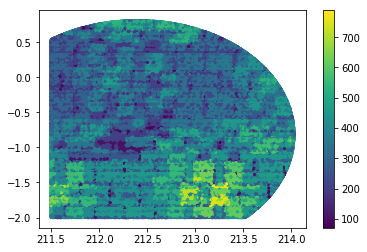

In [22]:
pl.scatter(onetile['RA'], onetile['DEC'], c=onetile['GALDEPTH_R'], s=5)
pl.colorbar()

In [23]:
onetile.write('svrand_100000.fits')

In [37]:
basedir   = os.path.join(os.getenv('SCRATCH'), 'svdc-summer2018')

In [40]:
for tileid in tiles['TILEID'].quantity:
  onetile = sv[is_point_in_desi(tiles[tiles['TILEID'] == tileid], sv['RA'], sv['DEC'], radius=None)]
  onetile.write(basedir + '/randoms/svrand_{}.fits'.format(tileid), overwrite=True)